In [1]:
import requests

In [10]:
from bs4 import BeautifulSoup
import urllib

In [3]:
import pandas as pd
import numpy as np

In [4]:
page_link = 'https://www.investing.com/indices/us-spx-500-historical-data'

In [5]:
page_response = requests.get(page_link, timeout=5)

In [69]:
import pandas as pd
from pandas import DataFrame
import argparse
import quandl
import pandas_datareader as web
from time import sleep
import datetime as dt
import sys

In [3]:
def get_sp500_data(start=dt.datetime.strptime("1997-01-01", "%Y-%m-%d"),
                   end=dt.datetime.now(), use_quandl=True, adjust=True, inner=True,
                   sleeptime=2, verbose=True):
    """Fetches S&P 500 data
     
    args:
        start: datetime; The earliest possible date
        end: datetime; The last possible date
        use_quandl: bool; Whether to fetch data from Quandl (reverts to Google if False)
        adjust: bool; Whether to use adjusted close (only works with Quandl)
        inner: bool; Whether to use an inner join or outer join when combining series (inner has no missing data)
        sleeptime: int; How long to sleep between fetches
        verbose: bool; Whether to print a log while fetching data
     
    return:
        DataFrame: Contains stock price data
    """
     
    join = "outer"
    if inner:
        join = "inner"
     
    symbols_table = pd.read_html("https://en.wikipedia.org/wiki/List_of_S%26P_500_companies",
                                 header=0)[0]
    symbols = list(symbols_table.loc[:, "Ticker symbol"])
 
    sp500 = None
    for s in symbols:
        sleep(sleeptime)
        if verbose:
            print("Processing: " + s + "...", end='')
        try:
            if use_quandl:
                s_data = quandl.get("WIKI/" + s, start_date=start, end_date=end)
                if adjust:
                    s_data = s_data.loc[:, "Adj. Close"]
                else:
                    s_data = s_data.loc[:, "Close"]
            else:
                s_data = web.DataReader(s, "google", start, end).loc[:, "Close"]
            s_data.name = s
            s_data.dropna()
            if s_data.shape[0] > 1:
                if sp500 is None:
                    sp500 = DataFrame(s_data)
                else:
                    sp500 = sp500.join(s_data, how=join)
                if verbose:
                    print(" Got it! From", s_data.index[0], "to", s_data.index[-1])
            else:
                if verbose:
                    print(" Sorry, but not this one!")
        except Exception:
            if verbose:
                print(" Sorry, but not this one!")
 
    badsymbols = list(set(s) - set(sp500.columns))
    if verbose and len(badsymbols) > 0:
        print("There were", len(badsymbols), "symbols for which data could not be obtained.")
        print("They are:", ", ".join(badsymbols))
     
    return sp500

In [15]:
import pandas as pd
from pandas_datareader import data as wb

ticker='BTC-USD'

ticker=wb.DataReader(ticker,start='2015-1-1',data_source='yahoo')
# print(ticker)

In [18]:
type(ticker)

pandas.core.frame.DataFrame

In [74]:
sp = wb.DataReader('^GSPC',start='2015-1-1',data_source='yahoo')

In [75]:
print(sp)

                   High          Low         Open        Close      Volume  \
Date                                                                         
2015-01-02  2072.360107  2046.040039  2058.899902  2058.199951  2708700000   
2015-01-05  2054.439941  2017.339966  2054.439941  2020.579956  3799120000   
2015-01-06  2030.250000  1992.439941  2022.150024  2002.609985  4460110000   
2015-01-07  2029.609985  2005.550049  2005.550049  2025.900024  3805480000   
2015-01-08  2064.080078  2030.609985  2030.609985  2062.139893  3934010000   
2015-01-09  2064.429932  2038.329956  2063.449951  2044.810059  3364140000   
2015-01-12  2049.300049  2022.579956  2046.130005  2028.260010  3456460000   
2015-01-13  2056.929932  2008.250000  2031.579956  2023.030029  4107300000   
2015-01-14  2018.400024  1988.439941  2018.400024  2011.270020  4378680000   
2015-01-15  2021.349976  1991.469971  2013.750000  1992.670044  4276720000   
2015-01-16  2020.459961  1988.119995  1992.250000  2019.420044  

In [27]:
type(sp)

pandas.core.frame.DataFrame

In [76]:
sp.columns

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [51]:
sp['Date'] = sp.index

In [77]:
sp500 = sp[['Close']]

In [79]:
print(sp500),sp500.index

                  Close
Date                   
2015-01-02  2058.199951
2015-01-05  2020.579956
2015-01-06  2002.609985
2015-01-07  2025.900024
2015-01-08  2062.139893
2015-01-09  2044.810059
2015-01-12  2028.260010
2015-01-13  2023.030029
2015-01-14  2011.270020
2015-01-15  1992.670044
2015-01-16  2019.420044
2015-01-20  2022.550049
2015-01-21  2032.119995
2015-01-22  2063.149902
2015-01-23  2051.820068
2015-01-26  2057.090088
2015-01-27  2029.550049
2015-01-28  2002.160034
2015-01-29  2021.250000
2015-01-30  1994.989990
2015-02-02  2020.849976
2015-02-03  2050.030029
2015-02-04  2041.510010
2015-02-05  2062.520020
2015-02-06  2055.469971
2015-02-09  2046.739990
2015-02-10  2068.590088
2015-02-11  2068.530029
2015-02-12  2088.479980
2015-02-13  2096.989990
...                 ...
2019-06-19  2926.459961
2019-06-20  2954.179932
2019-06-21  2950.459961
2019-06-24  2945.350098
2019-06-25  2917.379883
2019-06-26  2913.780029
2019-06-27  2924.919922
2019-06-28  2941.760010
2019-07-01  2964

(None, DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
                '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
                '2015-01-14', '2015-01-15',
                ...
                '2019-07-18', '2019-07-19', '2019-07-22', '2019-07-23',
                '2019-07-24', '2019-07-25', '2019-07-26', '2019-07-29',
                '2019-07-30', '2019-07-31'],
               dtype='datetime64[ns]', name='Date', length=1152, freq=None))

In [80]:
sp500.index

DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2019-07-18', '2019-07-19', '2019-07-22', '2019-07-23',
               '2019-07-24', '2019-07-25', '2019-07-26', '2019-07-29',
               '2019-07-30', '2019-07-31'],
              dtype='datetime64[ns]', name='Date', length=1152, freq=None)

In [59]:
type(sp500),type(sp500.Close)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [81]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARIMAResults
from sklearn.metrics import mean_squared_error as MSE

In [82]:
#Setting Graph size
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 10

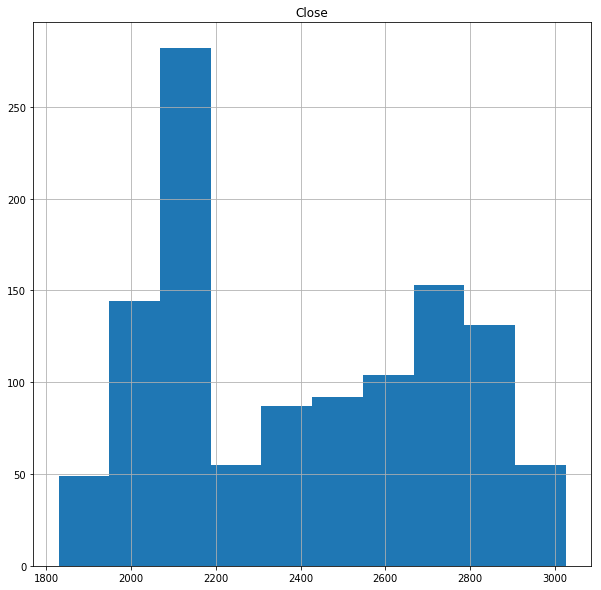

In [83]:
sp500.hist()
plt.show()

The Histogram shows us that most of the times S&P 500 close aws between 2200 - 2400. Analysing the data shows us that it recently breached the 3000 resistance due to strong growth

In [71]:
from pandas.tools.plotting import scatter_matrix

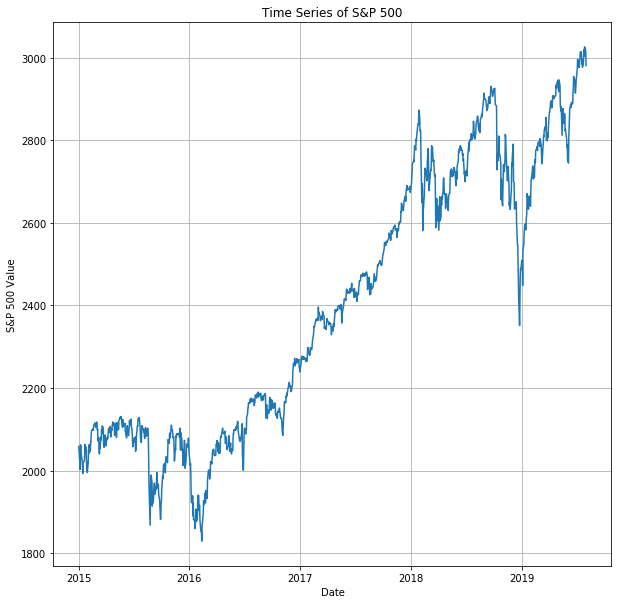

In [88]:
plt.plot(sp500['Close'])
plt.title('Time Series of S&P 500') 
plt.ylabel('S&P 500 Value')
plt.xlabel('Date')
plt.grid()
plt.show()

 The index dropped significantly durong 2018 end but rebounced quickly breaching the 3000 mark in recent times. 
 Also it it quite evident that the time series in non-stationary and the trent is growing upward. 
 Let's dive into checking the stationarity using the Auto-Dickey Fuller test 

### Stationarity Analysis ###

The Augmented Dickey-Fuller test is a type of statistical test called a unit root test.

The intuition behind a unit root test is that it determines how strongly a time series is defined by a trend.

There are a number of unit root tests and the Augmented Dickey-Fuller may be one of the more widely used. 

It uses an autoregressive model and optimizes an information criterion across multiple different lag values.


* __Null Hypothesis (H0)__: If failed to be rejected, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure.
* __Alternate Hypothesis (H1)__: The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.


In [92]:
df_test = adfuller(sp500['Close'], autolag='AIC')
result = pd.Series(df_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in df_test[4].items():
    result['Critical Value (%s)'%key] = value
print (result)


Test Statistic                   -0.552150
p-value                           0.881432
#Lags Used                        0.000000
Number of Observations Used    1151.000000
Critical Value (1%)              -3.436044
Critical Value (5%)              -2.864054
Critical Value (10%)             -2.568109
dtype: float64


Comparing the test statistic to the critical values, it looks like we would have to fail to reject the null hypothesis that the time series is non-stationary and does have time-dependent structure.